### 1. Packages 

First, let's run the cell below to import all the packages that you will need.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [12]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import parameter

### 2. Dataset

In [13]:
import tensorflow_datasets as tfds

(ds_train, ds_validation), ds_info = tfds.load(
    'imagenette',
    split=['train', 'validation'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)


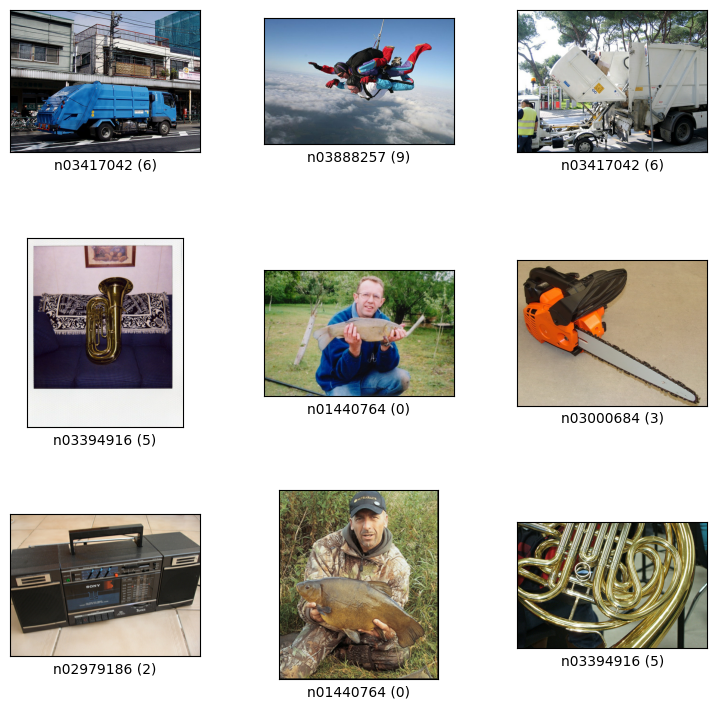

In [14]:
fig = tfds.show_examples(ds_train, ds_info)

In [15]:
def normalize_img(image, label):
    image = tf.image.resize(image, (parameter.IMAGE_SIZE, parameter.IMAGE_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(parameter.BATCH_SIZE)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

ds_validation = ds_validation.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_validation = ds_validation.batch(parameter.BATCH_SIZE)
ds_validation = ds_validation.prefetch(tf.data.experimental.AUTOTUNE)



### 3. Training

How to run:
- Change parameter

In [16]:
# Dataset
parameter.DATASET = 'imagenette' #'imagenet_resized/64x64'
parameter.numclasses = 10 #1000

# Model
parameter.CONV_DO_RATE = 0.1 #[0, 0.05, 0.1, 0.3, 0.5] #Không cần thiết với PT
parameter.LINEAR_DO_RATE = 0.3 #[0, 0.05, 0.1, 0.3, 0.5]
parameter.LEARNING_RATE = 3e-4 #[6e-5, 3e-4, 1e-3]

In [17]:
import tensorflow_datasets as tfds

import Models.InceptionV3_PT #Tất cả trừ resnet
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

model = Models.InceptionV3_PT.Model(parameter.numclasses)


Model: "InceptionV3_PT"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 resizing_1 (Resizing)       (None, 128, 128, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 40)                327720    
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_3 (Dense)             (None, 10)             

In [18]:
history = model.fit(
    ds_train,
    validation_data=ds_validation,
    epochs=1,
    verbose=2,
)

148/148 - 1955s - loss: 1.5703 - accuracy: 0.4242 - val_loss: 0.9695 - val_accuracy: 0.7424 - 1955s/epoch - 13s/step


### 4. Test

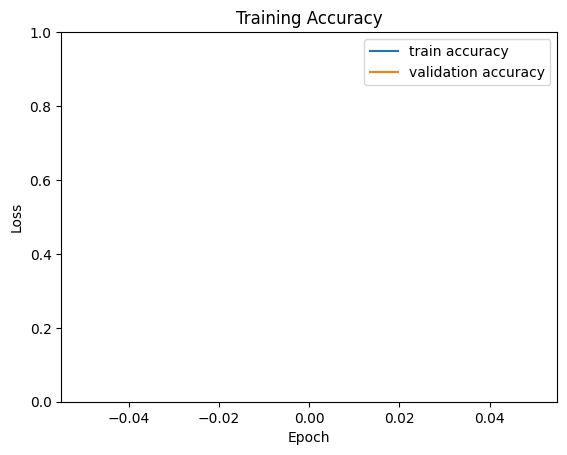

In [19]:
plt.plot(history.history['accuracy'], label="train accuracy")
plt.plot(history.history['val_accuracy'], label="validation accuracy")
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.legend()
plt.savefig(fname=f'{model.model.name}_{parameter.CONV_DO_RATE}-{parameter.LINEAR_DO_RATE}-{parameter.LEARNING_RATE}.png')
plt.show()


In [27]:
with open(f"result{parameter.DATASET}.txt", 'a') as f:
    f.write(f'{model.model.name}_{parameter.CONV_DO_RATE}-{parameter.LINEAR_DO_RATE}-{parameter.LEARNING_RATE}')
    f.write(str(history.history))
    f.write('\n')